In [ ]:
# Import the required module
from google.colab import drive

# Mount the Google Drive filesystem
drive.mount('/content/drive', force_remount=True)

In [ ]:
# Specify the path to your dataset folder
dataset_path = '/content/drive/MyDrive/cancer /cervical'

In [ ]:
import json
import pandas as pd
import numpy as np
from tqdm import tqdm
import cv2
from collections import defaultdict
from urllib import request
import os
import pandas as pd
import numpy as np
from urllib import request
import cv2
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dropout,Dense
from keras.models import Model
from keras.callbacks import EarlyStopping,ModelCheckpoint
import os
from tensorflow.keras.applications import VGG16
import json
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
import tensorflow
import tensorflow as tf
from collections import deque
import pandas as pd
import numpy as np
import cv2
import os
from tensorflow.keras.applications import MobileNetV2, Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
!pip install split_folders

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_file_path = '/content/drive/MyDrive/cancer /cervical_split/train'

val_file_path =  '/content/drive/MyDrive/cancer /cervical_split/val'

def data_pre_processing(valid_split = 0,input_size = (260, 260),image_color = 'rgb',batch_size = 32,
                        shuffle=True):


    train_gen=ImageDataGenerator(rescale=1/255.0,validation_split=valid_split,fill_mode='nearest',rotation_range=40,horizontal_flip=True)

    validation_gen=ImageDataGenerator(rescale=1/255.0,validation_split=valid_split)



    train_data=train_gen.flow_from_directory(directory=train_file_path,target_size=input_size,color_mode=image_color,
                                             batch_size=batch_size,shuffle=shuffle,class_mode='categorical')

    valid_data=validation_gen.flow_from_directory(directory=val_file_path,target_size=input_size,color_mode=image_color,
                                             batch_size=batch_size,shuffle=shuffle,class_mode='categorical')

    return train_data,valid_data

train,validation=data_pre_processing()

Found 4047 images belonging to 5 classes.
Found 793 images belonging to 5 classes.


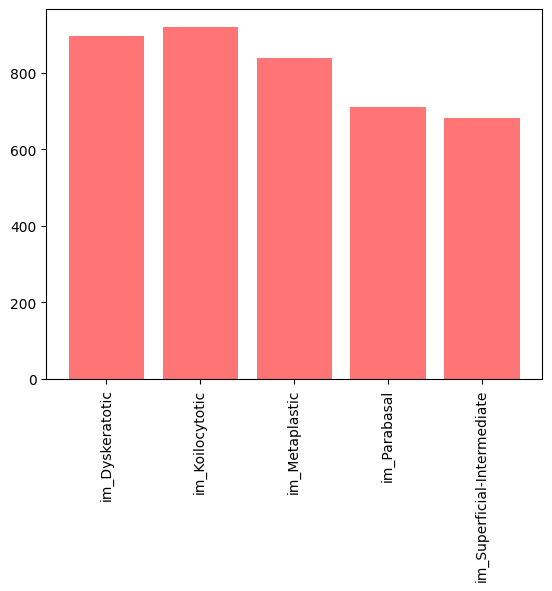

In [ ]:
values_counter=Counter(train.classes)
sorted(values_counter.items())
plt.bar(train.class_indices.keys(), values_counter.values(), color=(1, 0.1, 0.1, 0.6))
plt.xticks(rotation=90)
plt.show()

In [ ]:
labels=dict()
for label_name,label_num in train.class_indices.items():
        labels[label_num]=label_name

100%|██████████| 9/9 [03:11<00:00, 21.27s/it]


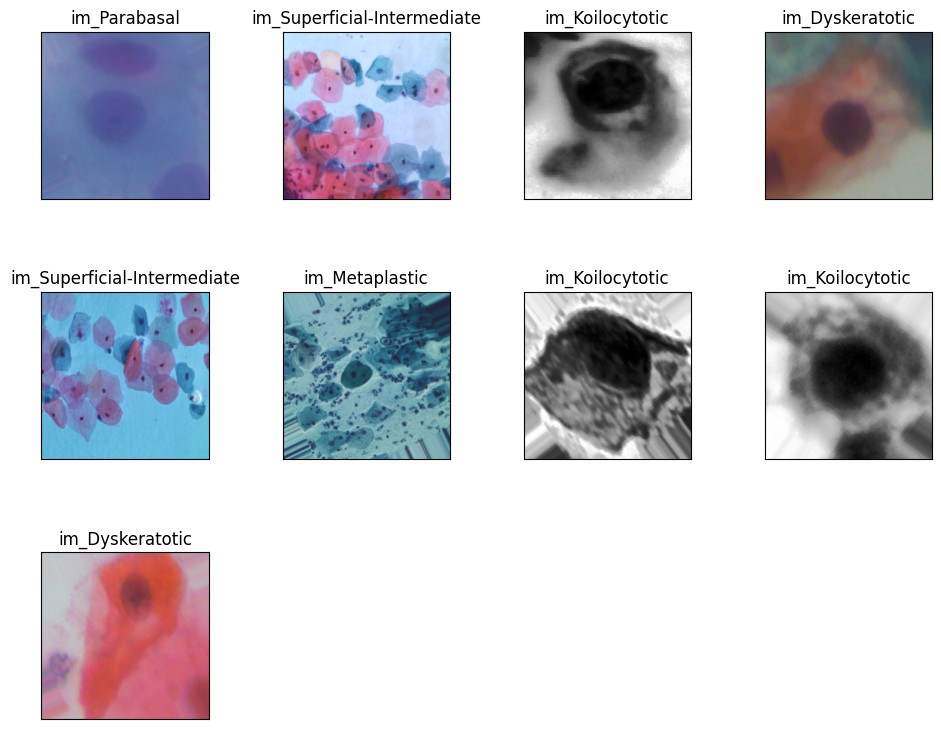

In [ ]:
plt.figure(figsize=(10,10))
for i in tqdm(range(9)):
    plt.subplot(4,4,i+1)
    for x_batch,y_batch in train:
        image=x_batch[0]
        argmax=np.argmax(y_batch)
        plt.tight_layout(h_pad=5)
        plt.title(labels[argmax])
        plt.xticks(())
        plt.yticks(())
        plt.imshow(image)
        break

In [ ]:
#dital image processing
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def enhance_contrast(image_path):
  """
  Enhances image contrast using histogram equalization.

  Args:
      image_path: Path to the image file.

  Returns:
      Enhanced image as a NumPy array.
  """
  # Read the image
  image = cv2.imread(image_path)

  # Convert to grayscale if necessary
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply histogram equalization
  equalized_image = cv2.equalizeHist(image)

  return equalized_image

# Example usage
image_path = "/content/drive/MyDrive/cancer /cervical_split/train/im_Dyskeratotic/001.bmp"
enhanced_image = enhance_contrast(image_path)

# Display the original and enhanced images (optional)
cv2_imshow(image)
cv2_imshow(enhanced_image)
cv2.waitKey(3)
cv2.destroyAllWindows()


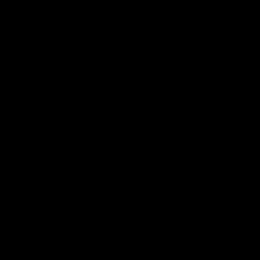

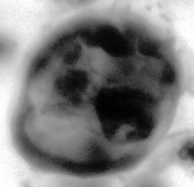

In [ ]:
#dital image processing
# image enhancement(contrast enhancement- histogram equalization)
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def enhance_contrast(image_path):
  """
  Enhances image contrast using histogram equalization.

  Args:
      image_path: Path to the image file.

  Returns:
      Enhanced image as a NumPy array.
  """
  # Read the image
  image = cv2.imread(image_path)

  # Convert to grayscale if necessary
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply histogram equalization
  equalized_image = cv2.equalizeHist(image)

  return equalized_image

# Example usage
image_path = "/content/drive/MyDrive/cancer /cervical_split/train/im_Koilocytotic/010_01.bmp"
enhanced_image = enhance_contrast(image_path)

# Display the original and enhanced images (optional)
cv2_imshow(image)
cv2_imshow(enhanced_image)
cv2.waitKey(3)
cv2.destroyAllWindows()

In [ ]:
import cv2
import os

def enhance_contrast(image_path):
  """
  Enhances image contrast using histogram equalization.

  Args:
      image_path: Path to the image file.

  Returns:
      Enhanced image as a NumPy array.
  """
  # Read the image
  image = cv2.imread(image_path)

  # Convert to grayscale if necessary
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply histogram equalization
  equalized_image = cv2.equalizeHist(image)

  return equalized_image

def enhance_folder(folder_path, output_folder=None, num_images=10):
  """
  Enhances contrast of all images in a folder, printing info for a limited number.

  Args:
      folder_path: Path to the folder containing images.
      output_folder (optional): Path to save the enhanced images.
                        If not provided, saves in the original folder.
      num_images (int, optional): Number of processed images to print info for. Defaults to 10.
  """
  processed_count = 0
  for filename in os.listdir(folder_path):
    # Get full image path
    image_path = os.path.join(folder_path, filename)
    # Check if it's a file (not a subfolder)
    if os.path.isfile(image_path):
      # Enhance the image
      enhanced_image = enhance_contrast(image_path)

      # Save the enhanced image
      if output_folder:
        # Create output folder if it doesn't exist
        os.makedirs(output_folder, exist_ok=True)
        output_path = os.path.join(output_folder, filename)
      else:
        output_path = image_path  # Save in the original folder

      cv2.imwrite(output_path, enhanced_image)
      cv2_imshow(image)
      cv2_imshow(enhanced_image)


      processed_count += 1
      if processed_count <= num_images:
        print(f"Enhanced: {filename}")

      # Stop processing after reaching the specified number
      if processed_count == num_images:
        break

# Example usage
image_folder = "/content/drive/MyDrive/cancer /cervical_split/train/im_Koilocytotic"
# Optional: Specify a separate output folder
# enhanced_folder = "/path/to/save/enhanced"
num_images_to_print = 5  # Change this value to print info for a different number of images
enhance_folder(image_folder, num_images=num_images_to_print)
# Display the original and enhanced images (optional)
cv2_imshow(image)
cv2_imshow(enhanced_image)
cv2.waitKey(3)
cv2.destroyAllWindows()


In [ ]:
!pip install google-colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.3 MB/s eta 0:00:00


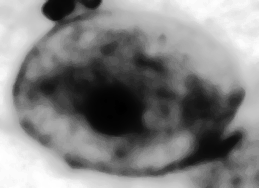

In [ ]:
#denoising (meadian filter)
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from google.colab.patches import cv2_imshow
def enhance_and_denoise(image_path, kernel_size=5):
  """
  Enhances contrast and denoises an image.

  Args:
      image_path: Path to the image file.
      kernel_size (int, optional): Size of the median filter kernel. Defaults to 5.

  Returns:
      Enhanced and denoised image as a NumPy array.
  """
  # Read the image
  image = cv2.imread(image_path)

  # Convert to grayscale if necessary
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply histogram equalization
  equalized_image = cv2.equalizeHist(image)

  # Apply median filter
  denoised_image = cv2.medianBlur(equalized_image, kernel_size)

  return denoised_image

# Example usage
image_path = "/content/drive/MyDrive/cancer /cervical_split/train/im_Metaplastic/016_05.bmp"
enhanced_denoised_image = enhance_and_denoise(image_path)

# Display the processed image (optional)
cv2_imshow( enhanced_denoised_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


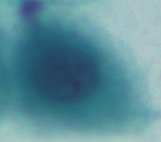

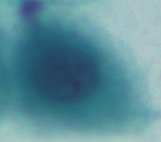

In [ ]:
#image restoration
#inpainting(patch_based method)
import cv2
import numpy as np
import random

def patch_inpainting(image, mask):
  """
  Simulates a patch-based inpainting approach for a single image.

  **Note:** This is a simplified implementation for illustration purposes only.

  Args:
      image: NumPy array representing the image.
      mask: NumPy array (same size as image) with 0 for masked region and 1 for valid region.

  Returns:
      Inpainted image as a NumPy array.
  """
  # Define patch size
  patch_size = 5

  # Inpainted image (copy of original)
  inpainted_image = image.copy()

  # Iterate over masked pixels
  for row in range(mask.shape[0]):
    for col in range(mask.shape[1]):
      if mask[row, col] == 0:  # Masked pixel
        # Search window size (consider extending beyond patch for better results)
        search_window_size = patch_size * 2

        # Get valid neighbor coordinates within search window (handle edge cases)
        valid_neighbors = []
        for neighbor_row in range(row - search_window_size // 2, row + search_window_size // 2 + 1):
          for neighbor_col in range(col - search_window_size // 2, col + search_window_size // 2 + 1):
            if 0 <= neighbor_row < image.shape[0] and 0 <= neighbor_col < image.shape[1] and mask[neighbor_row, neighbor_col] == 1:
              valid_neighbors.append((neighbor_row, neighbor_col))

        # Randomly select a valid neighbor patch
        if valid_neighbors:
          random_neighbor_index = random.randint(0, len(valid_neighbors) - 1)
          neighbor_row, neighbor_col = valid_neighbors[random_neighbor_index]
          neighbor_patch = image[neighbor_row:neighbor_row + patch_size, neighbor_col:neighbor_col + patch_size]

          # Copy neighbor patch to masked region
          inpainted_image[row:row + patch_size, col:col + patch_size] = neighbor_patch

  return inpainted_image

# Example usage (replace with your image and mask creation logic)
image = cv2.imread("/content/drive/MyDrive/cancer /cervical_split/train/im_Metaplastic/176_02.bmp")
mask = np.zeros_like(image[:, :, 0])  # Create a mask (replace with your mask logic)
  # Set mask values to 0 for masked region and 1 for valid region

inpainted_image = patch_inpainting(image, mask)

# Display the original and inpainted images (optional)
cv2_imshow(image)
cv2_imshow(inpainted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
#image segmentation (edge detection(canny edge detection))
import cv2
import numpy as np

def canny_edge_segmentation(image_path):
  """
  Segments an image using Canny edge detection.

  Args:
      image_path: Path to the image file.

  Returns:
      A tuple containing the original image, grayscale image, and edge image.
  """
  # Read the image
  image = cv2.imread(image_path)

  # Convert to grayscale
  grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply Gaussian filtering for noise reduction (optional)
  # blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)

  # Apply Canny edge detection
  canny_edges = cv2.Canny(grayscale_image, 100, 200)  # Adjust thresholds as needed

  return image, grayscale_image, canny_edges

# Example usage
image_path = "/content/drive/MyDrive/cancer /cervical_split/train/im_Parabasal/004.bmp"
original_image, grayscale_image, edges = canny_edge_segmentation(image_path)

# Display the original image, grayscale image, and edges (optional)
cv2_imshow( original_image)
cv2_imshow( grayscale_image)
cv2_imshow( edges)
cv2.waitKey()
cv2.destroyAllWindows()


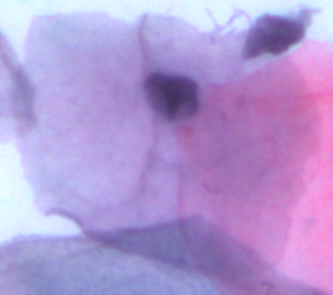

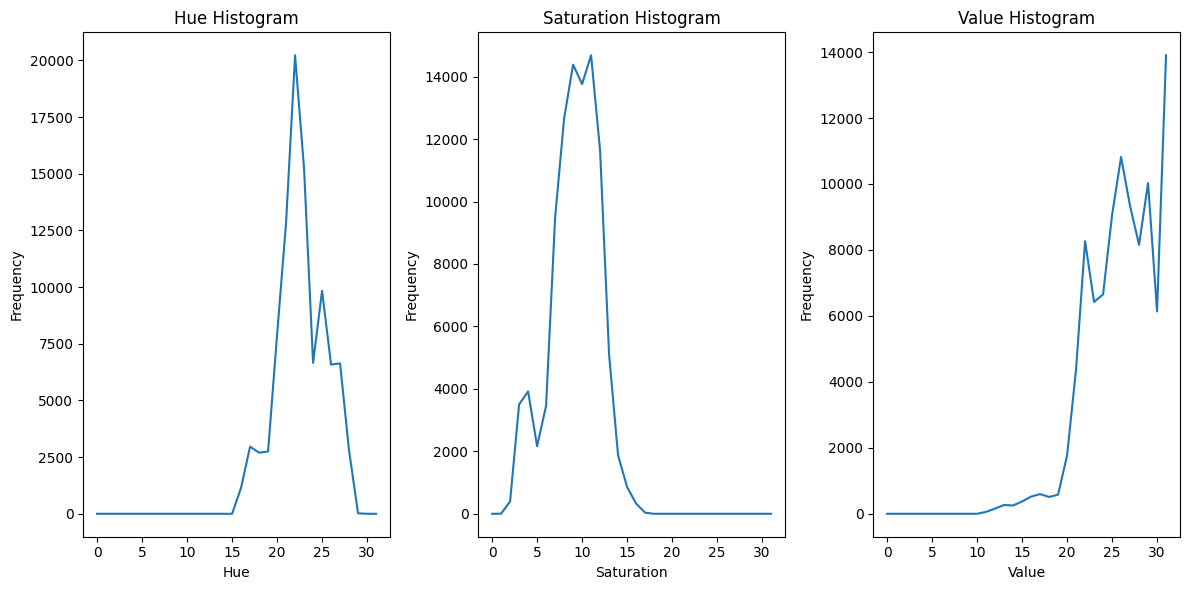

In [ ]:

#feature extraction and destribution
#color analysis (color histogram)
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_color_histogram(image_path, n_bins=32):
  """
  Extracts color histogram features from an image.

  Args:
      image_path: Path to the image file.
      n_bins (int, optional): Number of bins for the histogram. Defaults to 32.

  Returns:
      A tuple containing the original image and the color histogram.
  """
  # Read the image
  image = cv2.imread(image_path)

  # Convert to HSV colorspace (more intuitive for color analysis)
  hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  # Extract channels (Hue, Saturation, Value)
  h_channel, s_channel, v_channel = cv2.split(hsv_image)

  # Calculate color histograms for each channel
  h_hist = cv2.calcHist([h_channel], [0], None, [n_bins], [0, 180])  # Hue ranges from 0 to 179
  s_hist = cv2.calcHist([s_channel], [0], None, [n_bins], [0, 256])
  v_hist = cv2.calcHist([v_channel], [0], None, [n_bins], [0, 256])

  return image, h_hist, s_hist, v_hist

def plot_color_histograms(h_hist, s_hist, v_hist):
  """
  Plots the color histograms for visualization.

  Args:
      h_hist: Hue histogram.
      s_hist: Saturation histogram.
      v_hist: Value histogram.
  """
  plt.figure(figsize=(12, 6))
  plt.subplot(131)
  plt.plot(h_hist)
  plt.xlabel("Hue")
  plt.ylabel("Frequency")
  plt.title("Hue Histogram")

  plt.subplot(132)
  plt.plot(s_hist)
  plt.xlabel("Saturation")
  plt.ylabel("Frequency")
  plt.title("Saturation Histogram")

  plt.subplot(133)
  plt.plot(v_hist)
  plt.xlabel("Value")
  plt.ylabel("Frequency")
  plt.title("Value Histogram")

  plt.tight_layout()
  plt.show()

# Example usage
image_path = "/content/drive/MyDrive/cancer /cervical_split/train/im_Superficial-Intermediate/030_03.bmp"
original_image, h_hist, s_hist, v_hist = extract_color_histogram(image_path)

# Display the original image (optional)
cv2_imshow(original_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Plot the color histograms
plot_color_histograms(h_hist, s_hist, v_hist)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_color_histogram(image_path, n_bins=32):
  """
  Extracts color histogram features from an image.

  Args:
      image_path: Path to the image file.
      n_bins (int, optional): Number of bins for the histogram. Defaults to 32.

  Returns:
      A tuple containing the original image and the color histogram.
  """
  # Read the image
  image = cv2.imread(image_path)

  # Convert to HSV colorspace (more intuitive for color analysis)
  hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  # Extract channels (Hue, Saturation, Value)
  h_channel, s_channel, v_channel = cv2.split(hsv_image)

  # Calculate color histograms for each channel
  h_hist = cv2.calcHist([h_channel], [0], None, [n_bins], [0, 180])  # Hue ranges from 0 to 179
  s_hist = cv2.calcHist([s_channel], [0], None, [n_bins], [0, 256])
  v_hist = cv2.calcHist([v_channel], [0], None, [n_bins], [0, 256])

  return image, h_hist, s_hist, v_hist

def plot_color_histograms(h_hist, s_hist, v_hist):
  """
  Plots the color histograms for visualization.

  Args:
      h_hist: Hue histogram.
      s_hist: Saturation histogram.
      v_hist: Value histogram.
  """
  plt.figure(figsize=(12, 6))
  plt.subplot(131)
  plt.plot(h_hist)
  plt.xlabel("Hue")
  plt.ylabel("Frequency")
  plt.title("Hue Histogram")

  plt.subplot(132)
  plt.plot(s_hist)
  plt.xlabel("Saturation")
  plt.ylabel("Frequency")
  plt.title("Saturation Histogram")

  plt.subplot(133)
  plt.plot(v_hist)
  plt.xlabel("Value")
  plt.ylabel("Frequency")
  plt.title("Value Histogram")

  plt.tight_layout()
  plt.show()

# Example usage
image_path = "/content/drive/MyDrive/cancer /cervical_split/train/im_Superficial-Intermediate/031.bmp"
original_image, h_hist, s_hist, v_hist = extract_color_histogram(image_path)

# Display the original image (optional)
cv2_imshow(original_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Plot the color histograms
plot_color_histograms(h_hist, s_hist, v_hist)


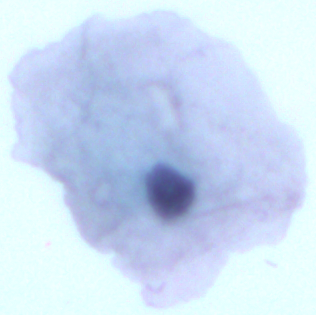

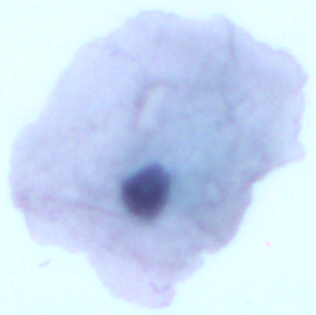

In [ ]:
#data augmentation (flipping)
import cv2

def flip_image_horizontally(image_path):
  """
  Flips an image horizontally for data augmentation.

  Args:
      image_path: Path to the image file.

  Returns:
      The flipped image as a NumPy array.
  """
  # Read the image
  image = cv2.imread(image_path)

  # Flip the image horizontally
  flipped_image = cv2.flip(image, 1)  # 1 for horizontal flip

  return flipped_image

# Example usage
image_path = "/content/drive/MyDrive/cancer /cervical_split/train/im_Superficial-Intermediate/064_05.bmp"
flipped_image = flip_image_horizontally(image_path)

# Display the original and flipped images (optional)
cv2_imshow(cv2.imread(image_path))  # Read again for display
cv2_imshow( flipped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


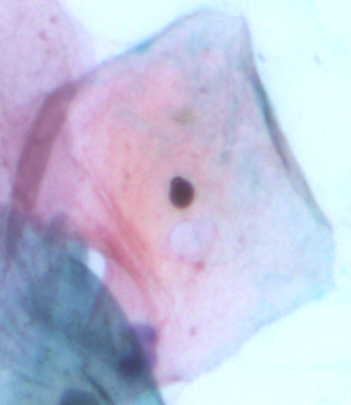

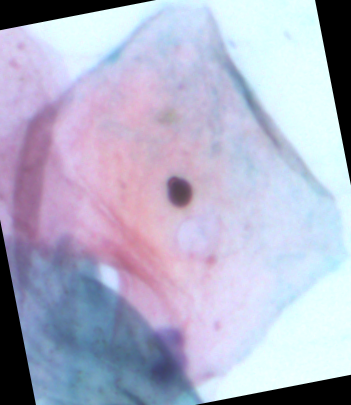

In [ ]:
#data augmentation(rotation)
import cv2
import random

def rotate_image(image_path, angle_range=(-10, 10)):
  """
  Rotates an image randomly within a specified angle range for data augmentation.

  Args:
      image_path: Path to the image file.
      angle_range (tuple, optional): Range of degrees for random rotation. Defaults to (-10, 10).

  Returns:
      The rotated image as a NumPy array.
  """
  # Read the image
  image = cv2.imread(image_path)

  # Get image dimensions (assuming rectangular image)
  image_height, image_width = image.shape[:2]

  # Get random rotation angle within the specified range
  rotation_angle = random.uniform(*angle_range)  # Random value between min and max angles

  # Define the rotation matrix
  center = (image_width // 2, image_height // 2)
  rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)  # Scale factor of 1.0

  # Perform image rotation
  rotated_image = cv2.warpAffine(image, rotation_matrix, (image_width, image_height))

  return rotated_image

# Example usage
image_path = "/content/drive/MyDrive/cancer /cervical_split/train/im_Superficial-Intermediate/083_09.bmp"
angle_range = (-20, 20)  # Adjust rotation range as needed
rotated_image = rotate_image(image_path, angle_range)

# Display the original and rotated images (optional)
cv2_imshow( cv2.imread(image_path))  # Read again for display
cv2_imshow( rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import random

In [ ]:
#data augmentation(color jittering)
import cv2
import random

def color_jitter(image_path, brightness=0.3, contrast=0.7, saturation=0.3, hue=0.1):
  """
  Applies random color jittering for data augmentation.

  Args:
      image_path: Path to the image file.
      brightness (float, optional): Range for random brightness jitter. Defaults to 0.3.
      contrast (float, optional): Range for random contrast jitter. Defaults to 0.7.
      saturation (float, optional): Range for random saturation jitter. Defaults to 0.3.
      hue (float, optional): Range for random hue jitter. Defaults to 0.1.

  Returns:
      The color-jittered image as a NumPy array.
  """
  # Read the image
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Convert to HSV for jittering

  # Convert the color jitter factors to HSV ranges
  brightness_jitter = random.uniform(-brightness, brightness)
  contrast_jitter = random.uniform(-contrast, contrast)
  saturation_jitter = random.uniform(-saturation, saturation)
  hue_jitter = random.uniform(-hue, hue)

  # Apply jittering to HSV channels
  h, s, v = cv2.split(image)
  h = (h + hue_jitter) % 180  # Wrap hue around 0-179
  s = s * (1 + saturation_jitter)
  v = v * (1 + brightness_jitter)
  v = v * (1 + contrast_jitter)

  # Merge the jittered channels back to HSV image
  jittered_hsv = cv2.merge((h, s, v))

  # Convert back to BGR for final image
 jittered_image = cv2.cvtColor(jittered_hsv, cv2.COLOR_HSV2BGR)

  return jittered_image

# Example usage
image_path = "/content/drive/MyDrive/cancer /cervical_split/train/im_Superficial-Intermediate/097.bmp"
jittered_image = color_jitter(image_path)

# Display the original and color-jittered images (optional)
cv2_imshow(cv2.imread(image_path))  # Read again for display
cv2_imshow(jittered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 40)

In [ ]:
def color_jitter(image_path, brightness=0.3, contrast=0.7, saturation=0.3, hue=0.1):
  """
  Applies random color jittering for data augmentation.

  Args:
      image_path: Path to the image file.
      brightness (float, optional): Range for random brightness jitter. Defaults to 0.3.
      contrast (float, optional): Range for random contrast jitter. Defaults to 0.7.
      saturation (float, optional): Range for random saturation jitter. Defaults to 0.3.
      hue (float, optional): Range for random hue jitter. Defaults to 0.1.

  Returns:
      The color-jittered image as a NumPy array.
  """
  # Read the image
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Convert to HSV for jittering

  # Convert the color jitter factors to HSV ranges
  brightness_jitter = random.uniform(-brightness, brightness)
  contrast_jitter = random.uniform(-contrast, contrast)
  saturation_jitter = random.uniform(-saturation, saturation)
  hue_jitter = random.uniform(-hue, hue)

  # Apply jittering to HSV channels
  h, s, v = cv2.split(image)
  h = (h + hue_jitter) % 180  # Wrap hue around 0-179
  s = s * (1 + saturation_jitter)
  v = v * (1 + brightness_jitter)
  v = v * (1 + contrast_jitter)

  # Merge the jittered channels back to HSV image
  jittered_hsv = cv2.merge((h, s, v))

  # Convert back to BGR for final image
  jittered_image = cv2.cvtColor(jittered_hsv, cv2.COLOR_HSV2BGR)


  return jittered_image

# Example usage
image_path = "/content/drive/MyDrive/cancer /cervical_split/train/im_Superficial-Intermediate/097.bmp"
jittered_image = color_jitter(image_path)

# Display the original and color-jittered images (optional)
cv2_imshow(cv2.imread(image_path))  # Read again for display
cv2_imshow(jittered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [ ]:
from tensorflow.keras import layers, models


input_shape = ( 260, 260, 3)
n_classes = 5

# Define the model
model = models.Sequential([
    layers.Conv2D(16,(3,3), activation='relu', input_shape=(260, 260, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32,(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16,(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16,(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# Build the model
model.build(input_shape=input_shape)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train,
                    validation_data=validation,
                    epochs=40)
# Save the model
model.save('cervical_cancer_detection_model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 258, 258, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 129, 129, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow import keras



# Save the entire model
model.save('Cervical_model.keras')

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(validation)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

25/25 [==============================] - 23s 882ms/step - loss: 1.5121 - accuracy: 0.7453
Test Loss: 1.5121409893035889
Test Accuracy: 0.7452711462974548


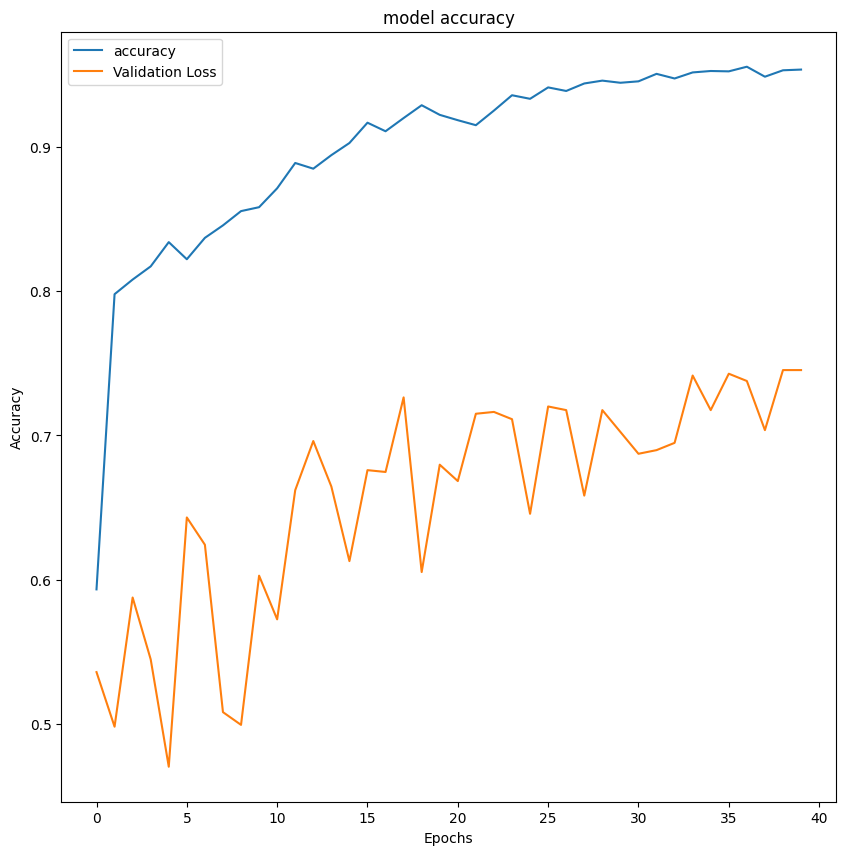

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["accuracy","Validation Loss"])
plt.show()

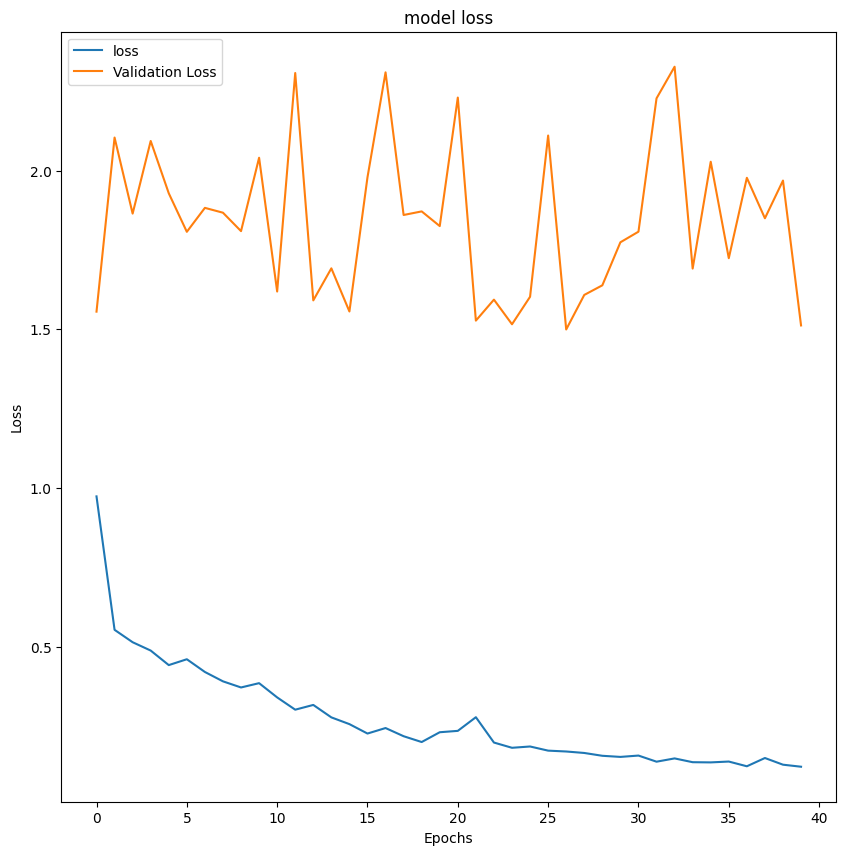

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["loss","Validation Loss"])
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define paths
model_path = '/content/Cervical_model.keras'
test_image_path = '/content/drive/MyDrive/cancer /cervical/im_Dyskeratotic/im_Dyskeratotic/001.bmp'

# Load the saved model
model = models.load_model(model_path)

# Load and preprocess the test image
test_image = image.load_img(test_image_path, target_size=(260, 260))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image /= 255.  # Normalize the image

# Make predictions
predictions = model.predict(test_image)
predicted_class_index = np.argmax(predictions[0])

# Map predicted class index to class labels
if predicted_class_index not in class_labels:
    class_labels[predicted_class_index] = 'Unknown'
class_labels = {1: 'im_Dyskeratotic', 2: 'im_Metaplastic', 3:  'im_Superficial-Intermediate', 4: 'im_Koilocytotic', 5: 'im_Parabasal'}  # Update with your actual class labels
predicted_class_label = class_labels[predicted_class_index]
predicted_class_label = class_labels[predicted_class_index]

# Visualize the test image, actual class, and predicted class
plt.imshow(image.load_img(test_image_path))
plt.title(f"Predicted class: {predicted_class_label}")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 143ms/step


KeyError: 0

In [ ]:
print(class_labels.keys())

dict_keys([1, 2, 3, 4, 5])
